Files already downloaded and verified
Files already downloaded and verified


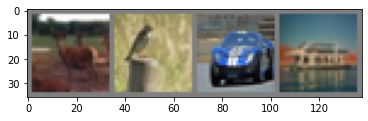

 deer  bird   car  ship


Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [5]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

transform = transforms.Compose( [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# function for showing image

def imshow(img):
    img = img / 2 + 0.5   # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# 3*32*32 -> 6*28*28 -> 6*14*14 -> 16*10*10 -> 16*5*5
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3,6,5) 
        self.pool = nn.MaxPool2d(2,2) # kennel 2 , stride 2
        self.conv2 = nn.Conv2d(6, 16, 5)  
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()
net.to(device)

[1,  2000] loss: 2.304
[1,  4000] loss: 2.303
[1,  6000] loss: 2.303
[1,  8000] loss: 2.303
[1, 10000] loss: 2.303
[1, 12000] loss: 2.303
total image : 50000 
[2,  2000] loss: 2.303
[2,  4000] loss: 2.303
[2,  6000] loss: 2.303
[2,  8000] loss: 2.303
[2, 10000] loss: 2.303
[2, 12000] loss: 2.303
total image : 100000 


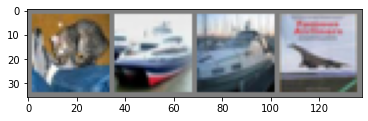

GroundTruth:    cat  ship  ship plane
Predicted:  plane plane plane plane
Accuracy of the network on the 10000 test images:    10 % / total : 10000 


In [6]:
criterion = nn.CrossEntropyLoss()            
optimizer = optim.Adam(net.parameters(), lr=0.001) 

total = 0
for epoch in range(2):  
    running_loss = 0.0 # Epoch당 0으로 초기화
    for i, data in enumerate(trainloader, 0):  # enumerate
        # Data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        total += labels.size(0)
        
        # 기울기 초기화
        optimizer.zero_grad()

        # 순전파 + 손실함수계산 + 역전파 + 학습
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print
        running_loss += loss.item() # 2000 mini-batches의 모든 loss 합치기
        if i % 2000 == 1999:    # 2000번째마다 loss출력
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0 # 2000번째마다 0으로 초기화
    print('total image : %d '%(total)) 

# Test 이미지 일부에 대한 예측
dataiter = iter(testloader) 
images, labels = dataiter.next()
# print images
imshow(torchvision.utils.make_grid(images))
# print labels
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
#--------------------------------------------------------------------
net1 = Net()
net1.to(device)
outputs = net1(images)
_, predicted = torch.max(outputs,1) # dim=1

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))
# 전체 데이터 셋에 대해 평가
correct = 0
total = 0
with torch.no_grad():  # 평가할 땐 기울기 추적을 안함
    for data in testloader: 
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1) 

        total += labels.size(0) # labels.size(0) == 4 
        correct += (predicted == labels).sum().item() # 4개 중 몇개를 맞췄는지 
        

print('Accuracy of the network on the 10000 test images: %5d %% / total : %5d ' % (100 * correct / total, total))


In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu
